In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import pandas as pd
import numpy as np

In [68]:
gold_price = pd.read_csv('/content/Gold Price Prediction Dataset.csv')

In [69]:
print(gold_price.shape)
print(gold_price.columns)
print(gold_price.info())

(1718, 19)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'EU_Trend',
       'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1718 non-null   object 
 1   Open        1718 non-null   float64
 2   High        1718 non-null   float64
 3   Low         1718 non-null   float64
 4   Close       1718 non-null   float64
 5   Adj Close   1718 non-null   float64
 6   Volume      1718 non-null   int64  
 7   SP_open     1697 non-null   float64
 8   SP_high     1697 non-null   float64
 9   SP_low      1718 non-null   float64
 10  SP_close    1718 non-null   float64
 11  SP_Ajclose  1718 non-null   float64
 12  EU_Trend    1718 non-null   object 
 13  OF_Price    1718

**Dealing with Null Values**

In [70]:
gold_price.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
SP_open,21
SP_high,21
SP_low,0


In [71]:
gold_price['SP_open'] = gold_price ['SP_open'].interpolate(method='linear')
gold_price['SP_high'] = gold_price ['SP_high'].interpolate(method='linear')

**Dealing will Duplicates**

In [72]:
duplicate_rows = gold_price.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [73]:
equal_rows = gold_price['Close'] == gold_price['Adj Close']
equal_count = equal_rows.sum()
print(equal_count)

1718


In [74]:
gold_price.drop(['Close'], inplace=True, axis=1)

**Handling Categorical Variables**

In [75]:
gold_price['Date'] = pd.to_datetime(gold_price['Date'])

<ipython-input-75-295587dacecc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gold_price['Date'] = pd.to_datetime(gold_price['Date'])


In [76]:
gold_price['Year'] = gold_price['Date'].dt.year

In [77]:
gold_price = gold_price.drop(columns=['Date'])

In [78]:
gold_price['EU_Trend'] = gold_price['EU_Trend'].map({'A': 0, 'B': 1})
gold_price['OF_Trend'] = gold_price['OF_Trend'].map({'A': 0, 'B': 1})

In [79]:
print(gold_price.head())

         Open        High         Low   Adj Close    Volume     SP_open  \
0  154.740005  154.949997  151.710007  152.330002  21521900  123.029999   
1  154.309998  155.369995  153.899994  155.229996  18124300  122.230003   
2  155.479996  155.860001  154.360001  154.869995  12547200  122.059998   
3  156.820007  157.429993  156.580002  156.979996   9136300  122.180000   
4  156.979996  157.529999  156.130005  157.160004  11996100  122.571818   

      SP_high      SP_low    SP_close  SP_Ajclose  EU_Trend  OF_Price  \
0  123.199997  121.989998  122.180000  105.441238         0    105.09   
1  122.949997  121.300003  121.589996  105.597549         0    103.35   
2  122.320000  120.029999  120.290001  104.468536         1    103.64   
3  124.139999  120.370003  123.930000  107.629784         0    106.73   
4  124.474545  122.750000  124.169998  107.838242         1    107.71   

   OF_Open  OF_High  OF_Low  OF_Volume  OF_Trend  Year  
0   104.88   106.50  104.88      14330         0  201

**Removing variables using correlation**

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

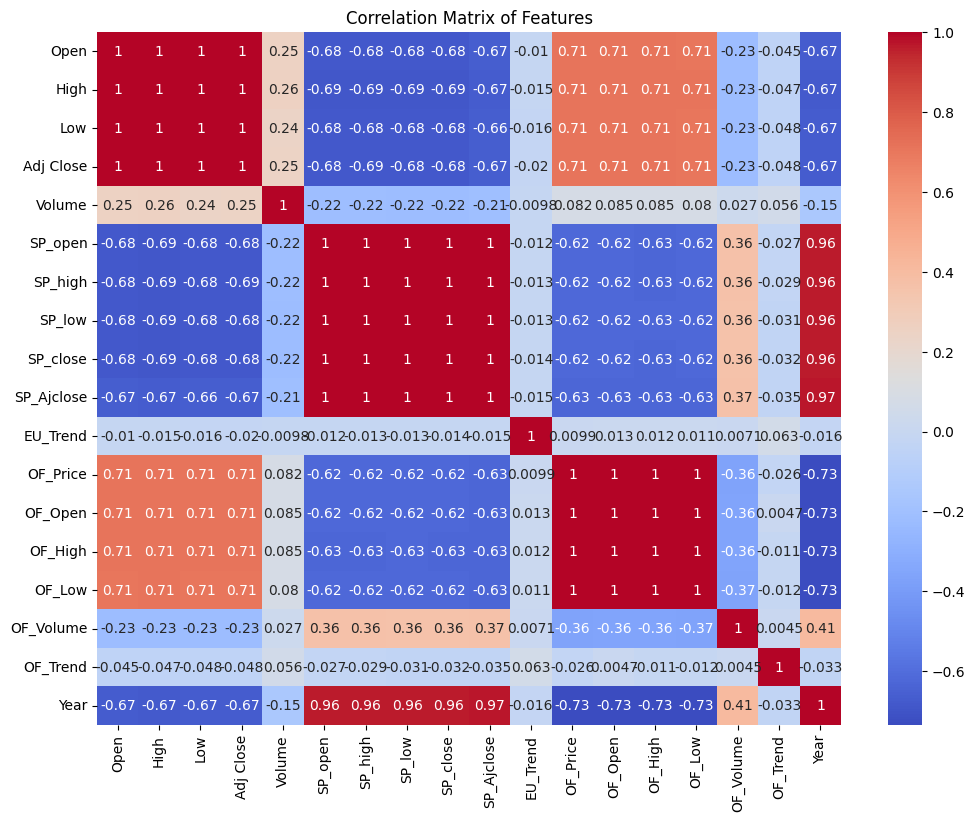

In [81]:
correlation_matrix = pd.concat([gold_price], axis=1).corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [82]:
gold_price.drop(['Open'], inplace=True, axis=1)
gold_price.drop(['EU_Trend'], inplace=True, axis=1)

**Feature Scaling**

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nc = gold_price.select_dtypes(include=['float64', 'int64']).columns
gold_price[nc] = scaler.fit_transform(gold_price[nc])

**Linear Regression**

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [85]:
X = gold_price.drop(columns=['Adj Close'])
y = gold_price['Adj Close']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=1)
liner_model = LinearRegression()
liner_model.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred = liner_model.predict(X_test)

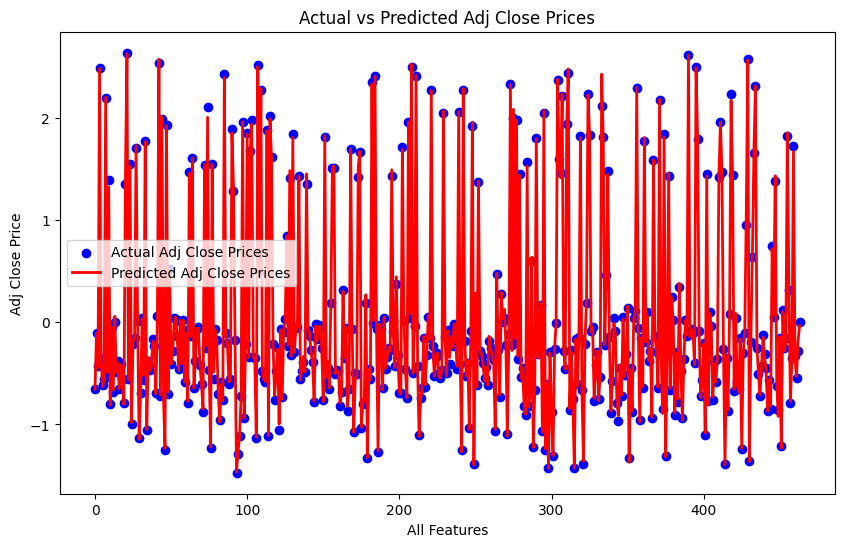

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Adj Close Prices')
plt.plot(range(len(y_test)), y_pred, color='red', linewidth=2, label='Predicted Adj Close Prices')
plt.title('Actual vs Predicted Adj Close Prices')
plt.xlabel('All Features')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

msq_error = mean_squared_error(y_test, y_pred)
rmsq_error = np.sqrt(msq_error)
mabs_error = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {msq_error}')
print(f'Root Mean Squared Error (RMSE): {rmsq_error}')
print(f'Mean Absolute Error (MAE): {mabs_error}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.000837863052088416
Root Mean Squared Error (RMSE): 0.028945864162059767
Mean Absolute Error (MAE): 0.018149913239920323
R-squared (R²): 0.9991593974423879


**Logistic Regression**

In [90]:
t = gold_price['Adj Close'].median()

In [91]:
print(t)

-0.3151233881873714


In [92]:
gold_price['Adj Close Classification'] = (gold_price['Adj Close'] >= t).astype(int)

In [93]:
above_t = gold_price['Adj Close Classification'].sum()
print(f'Number of values above the threshold are {above_t}')
print(f'Number of values below the threshold are {len(gold_price) - above_t}')

Number of values above the threshold are 859
Number of values below the threshold are 859


In [94]:
M = gold_price.drop(columns=['Adj Close', 'Adj Close Classification'])
n = gold_price['Adj Close Classification']

In [95]:
from sklearn.linear_model import LogisticRegression

M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.27, stratify=n, random_state=1)
logistic_model = LogisticRegression()
logistic_model.fit(M_train, n_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
n_pred = logistic_model.predict(M_test)

In [97]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

accr = accuracy_score(n_test, n_pred)
recall = recall_score(n_test, n_pred, average='binary')
pcsn = precision_score(n_test, n_pred, average='binary')
f1 = f1_score(n_test, n_pred, average='binary')
cf_mtx = confusion_matrix(n_test, n_pred)

print(f'Accuracy: {accr}')
print(f'Recall: {recall}')
print(f'Precision: {pcsn}')
print(f'F1-Score: {f1}')
print('Confusion Matrix:')
print(cf_mtx)


Accuracy: 0.9870689655172413
Recall: 0.978448275862069
Precision: 0.9956140350877193
F1-Score: 0.9869565217391304
Confusion Matrix:
[[231   1]
 [  5 227]]
